In [41]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
import plotly.express as px

In [ ]:
url = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/kmeans/student_clustering.csv'
df = pd.read_csv(url)
df.head()

In [ ]:
plt.scatter(df['cgpa'],df['iq'])
plt.show()

In [ ]:
wcss = []

for i in range(1,30):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

In [ ]:
wcss

In [ ]:
plt.plot(range(1,30),wcss)

In [32]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

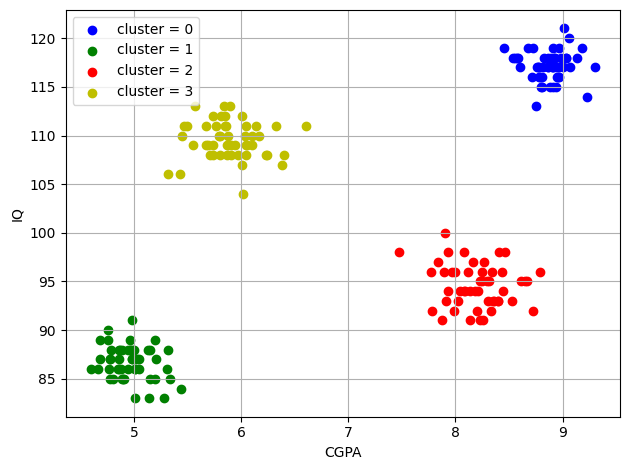

In [34]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='b',label = 'cluster = 0')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='g',label = 'cluster = 1')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='r',label = 'cluster = 2')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='y',label = 'cluster = 3')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [39]:
# K-means on 3D data
centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]
X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)


In [42]:
fig = px.scatter_3d(x=X[:,0],y=X[:,1],z=X[:,2])
fig.show()

In [43]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

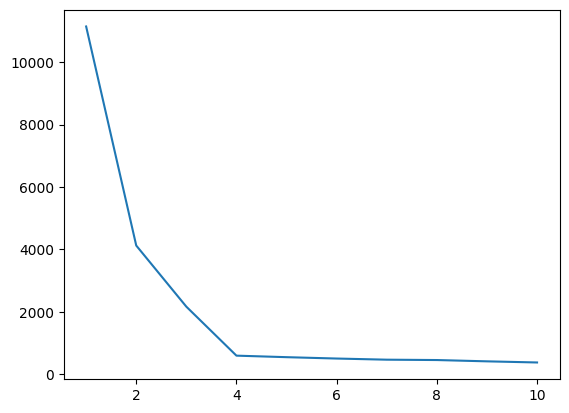

In [44]:
plt.plot(range(1,11),wcss)
plt.show()

In [45]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [49]:
df = pd.DataFrame()
df['x'] = X[:,0]
df['y'] = X[:,1]
df['z'] = X[:,2]
df['label'] = y_pred

In [50]:
fig = px.scatter_3d(data_frame=df,x='x',y='y',z='z',color='label')
fig.show()